In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Задача:

1.1. Скачать данные (недвижимость)

1.2 Изучите стоимости недвижимости

1.3 Изучите распределение квадратуры жилой площади

1.4 Изучите распределение года постройки

2.1 Изучите распределение домов от наличия вида на набережную

2.2 Изучите распределение этажей домов

2.3. Изучите распределение состояния домов

3.Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

*Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.*

### 1.1. Скачать данные (недвижимость)
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы



In [2]:
df = pd.read_csv('kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'])

df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 1.2 Изучите стоимости недвижимости


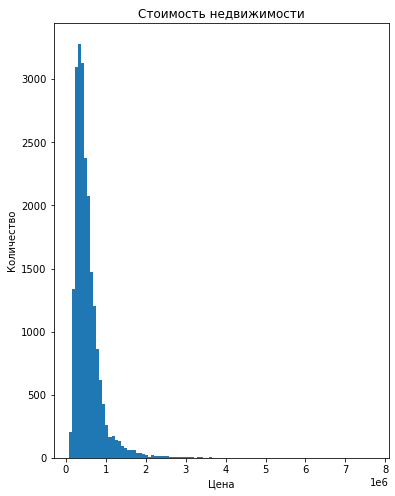

In [3]:
plt.figure(figsize=(6,8))
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество')

plt.hist(df['price'], bins=100);

Вывод: максимальное количество недвижимости продается по цене до ~700 000-1 000 000 д.е., основная часть недвижимости продается по цене до 2 000 000 д.е.

### 1.3 Изучите распределение квадратуры жилой площади


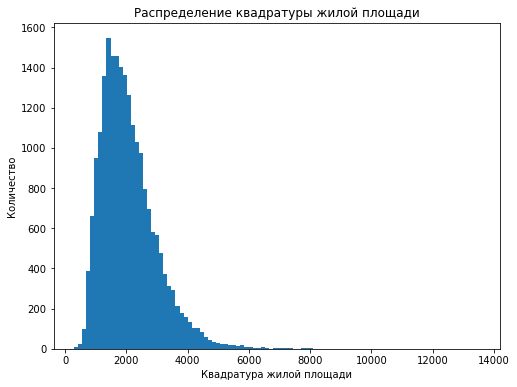

In [4]:
plt.figure(figsize=(8,6))

plt.title('Распределение квадратуры жилой площади');
plt.xlabel('Квадратура жилой площади')
plt.ylabel('Количество')

plt.hist(df['sqft_living'], bins=100);

Вывод: максимальное количество недвижимости продается с жилой площадью от ~1700 до 2300 кв.м., основная часть недвижимости продается с жилой площадью от ~500 до 6000 кв.м.

### 1.4 Изучите распределение года постройки


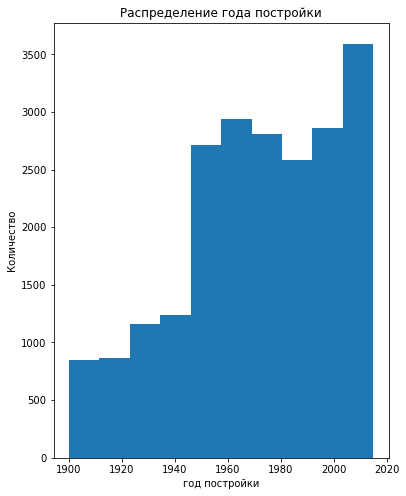

In [5]:
plt.figure(figsize=(6,8))
plt.title('Распределение года постройки')
plt.xlabel('год постройки')
plt.ylabel('Количество')

plt.hist(df['yr_built']);

Вывод: максимальное количество недвижимости продается с годом постройки от ~2010 до 2020 гг.

## Задание 2

### 2.1 Изучите распределение домов от наличия вида на набережную


In [6]:
data1 = df['waterfront'].value_counts()
data1

0    21450
1      163
Name: waterfront, dtype: int64

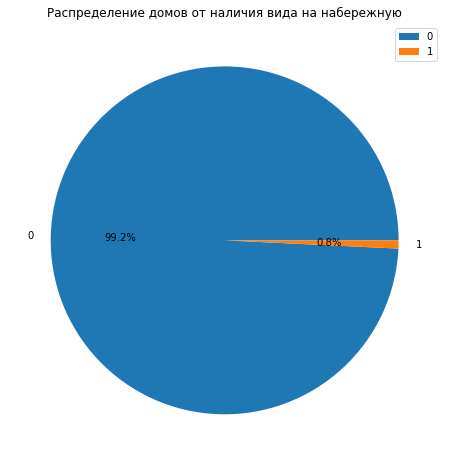

In [7]:
plt.figure(figsize=(10,8))
plt.pie(data1.values, autopct='%1.1f%%', labels=data1.index)
plt.legend(data1.index)
plt.title('Распределение домов от наличия вида на набережную');

Вывод: всего лишь 0,8% всей недвижимости продается с видом на набережную

### 2.2 Изучите распределение этажей домов


In [8]:
data2 = df['floors'].value_counts(normalize=True)*100
data2

1.0    49.414704
2.0    38.129829
1.5     8.837274
3.0     2.836256
2.5     0.744922
3.5     0.037015
Name: floors, dtype: float64

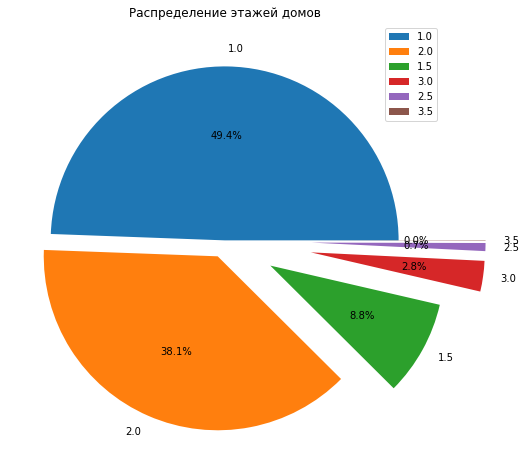

In [9]:
plt.figure(figsize=(10,8))
explode = [0.0, 0.1, 0.3, 0.5, 0.5, 0.5]
plt.pie(data2.values, autopct='%1.1f%%', labels=data2.index, explode=explode)
plt.legend(data2.index)
plt.title('Распределение этажей домов');

Вывод: 
- большая часть (49,4%) недвижимости продается с 1 этажом;
- также  38,1% продается 2-этажных домов;
- минимальная доля приходится на 2,5-этажные и 3,5-этажные дома (0,74%, 0,04%)

### 2.3 Изучите распределение состояния домов


In [10]:
data3 = df['condition'].value_counts(normalize=True)
data3

3    0.649193
4    0.262759
5    0.078703
2    0.007958
1    0.001388
Name: condition, dtype: float64

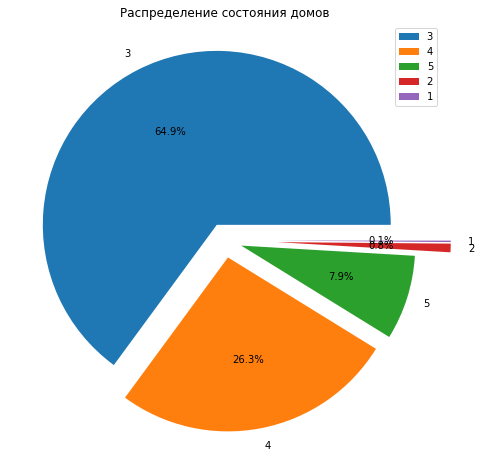

In [11]:
plt.figure(figsize=(10,8))
explode = [0.1, 0.1, 0.1, 0.3, 0.3]
plt.pie(data3.values, autopct='%1.1f%%', labels=data3.index, explode=explode)
plt.legend(data3.index)
plt.title('Распределение состояния домов');

Вывод:
- наибольшая доля продаваемой недвижимости приходится на дома с состоянием, оцениваемым в 3 б. (64.9%);
- около 26,3% недвижимости продается с состоянием, оцениваемым в 4 б.;
- на дома с наихудшим состоянием приходятся наименьшие доли (0,1% и 0,8% на 1б. и 2б. соответственно).

## Задание 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

**решила строить ящики с усами, потому что показалось, что это самый информативный вариант (напишите, если все-таки потребуется строить другие типы диаграмм)**

In [12]:
data = df.groupby('yr_built')['price'].mean().reset_index()
data

,yr_built,price
0,1900,581387.206897
1,1901,556935.931034
2,1902,673007.407407
3,1903,480958.195652
4,1904,583756.644444
...,...,...
111,2011,544522.000000
112,2012,527447.335294
113,2013,678545.452736
114,2014,683681.754919


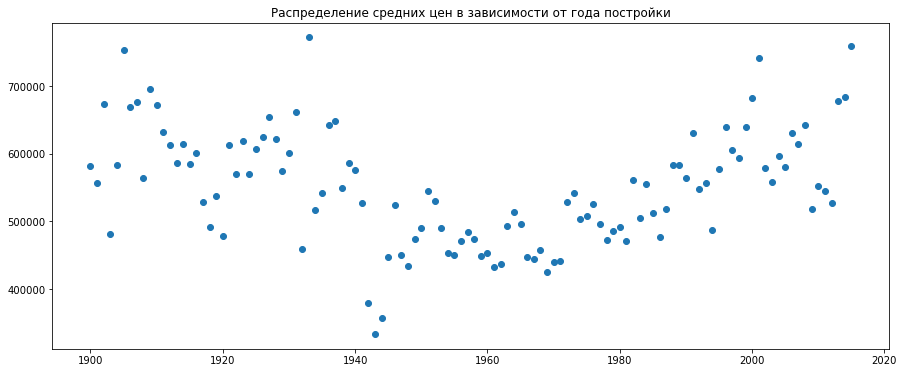

In [13]:
plt.figure(figsize=(15, 6))
plt.scatter(data['yr_built'], data['price'])
plt.title('Распределение средних цен в зависимости от года постройки');

Вывод: 
- распределение цены в зависимости от года постройки имеет U-образную форму;
- цена на дома, построенные с 1900-х до 1960-х, постепенно опускалась;
- при этом цена на дома, построенные в1940-х годах,  принимает неожиданно низкие значения;
- цена на дома, построенные с 1960-х годов, вновь начала расти;
- для домов, построенных в2020-х годах, цена почти такая же, как и для домов, построенных в 1900-х годах;
- могу предположить, что старые дома, которые стоят больше 1 века, имеют особую историческую значимость и поэтому их цена находится на одном уровне с ценами домов, построенных в 2000-х годах.

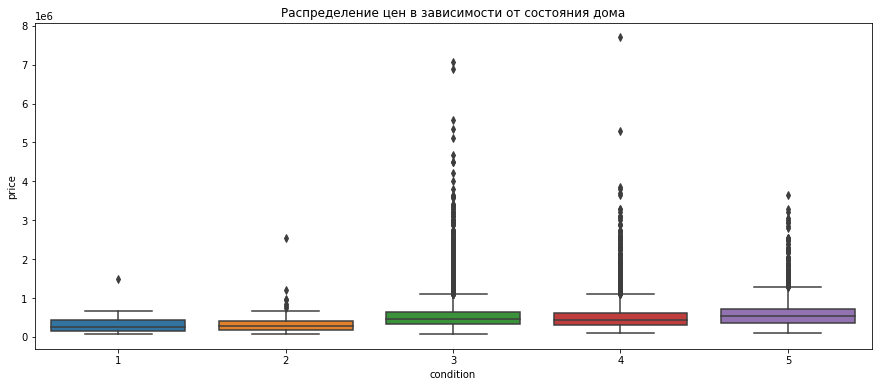

In [14]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['price'], x=df['condition'])
plt.title('Распределение цен в зависимости от состояния дома');

Вывод:
- дома, состояние которых оценивается в 1 и 2 б., почти не имеют выбросов;
- для домов с состоянием в 3-5 б. 75% наблюдений находится почти на одном и том же уровне цены;
- по домам с состоянием в 3-4 б. наблюдается максимальное количество выбросов. Так, для дома с состоянием 4 б. цена достигла 8 000 000 д.е.

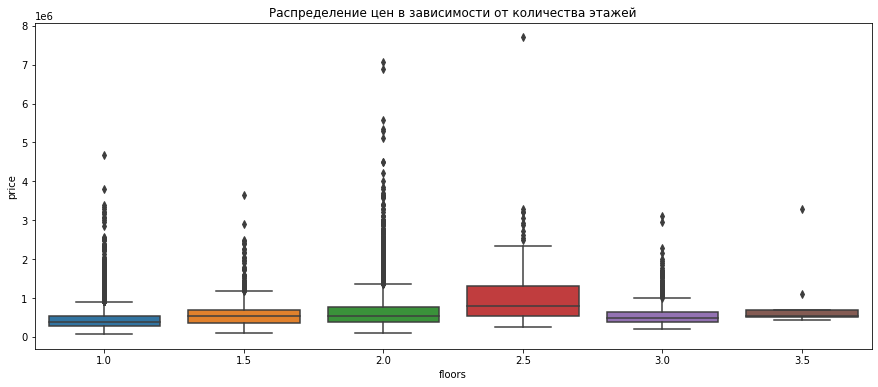

In [15]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['price'], x=df['floors'])
plt.title('Распределение цен в зависимости от количества этажей');

Вывод:
- наибольший разбег в пределах 3 сигм по ценам наблюдается для домов в 2,5 этажей;
- минимальный разбег в пределах 3 сигм по ценам наблюдается для домов в 3,5 этажей;
- по 2-этажным домам наблюдается максимальное количество выбросов;
- самый дорогой дом имеет 2,5 этажа и продается почти за 8 000 000 д.е.;
- дома с 3,5 этажами почти не имеют выбросов;
- цена, по которой продаются 50% 2,5-этажных домов, находится на одном уровне с ценой, по которой продаются 100% 3,5-этажных домов;
- цена, по которой продаются 50% 1-этажных, 1,5-этажных, 2-этажных и 3-этажных домов, находится почти на одном уровне.

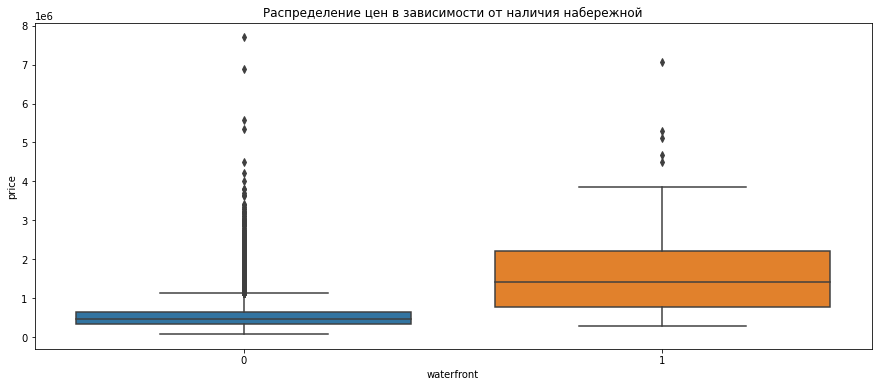

In [16]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['price'], x=df['waterfront'])
plt.title('Распределение цен в зависимости от наличия набережной');

Вывод:
- уровень цен 50% домов, не имеющих набережную, значительно ниже, чем цена 50% домов, имеющих ее;
- для домов без набережной выбросов намного больше;
- разбег цены для домов с набережной больше, чем для домов без нее;
- при этом максимальная цена наблюдается для дома без набережной.

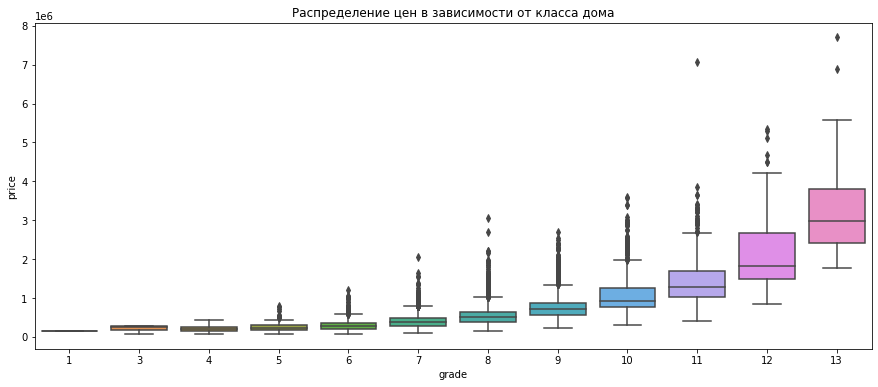

In [17]:
plt.figure(figsize=(15, 6))
sns.boxplot(y=df['price'], x=df['grade'])
plt.title('Распределение цен в зависимости от класса дома');

Вывод:
- с увеличением уровня класса растет разбег по цене;
- цены по домам с 1, 3 и 4 классом сосредоточены в пределах 3 сигм;
- для домов с 7-11 классом наблюдается максимальное количество выбросов.